In [1]:
from multiprocessing import current_process
from netgen.meshing import *
from netgen.csg import *
from netgen.occ import *
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo
import math
from numpy import *
import scipy.sparse as sp
import matplotlib.pylab as plt
from scipy.io import savemat
import scipy.sparse as sp

import os, sys
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 
cpp_solver="EMPY"
#cpp_solver="JP_MARs"

In [2]:
from numpy import *
from netgen.csg import Pnt
from netgen.meshing import Element3D, Element2D, MeshPoint, FaceDescriptor, Mesh
mesh = Mesh()
mesh.dim = 3
dom = {}
dom3d = {}
dom3d[1] =1
dom3d[2] =2
dom[2] = mesh.Add(FaceDescriptor(bc=2, domin=2, surfnr=2))
dom[3] = mesh.Add(FaceDescriptor(bc=3, domin=3, surfnr=3))
dom[4] = mesh.Add(FaceDescriptor(bc=4, domin=4, surfnr=4))
#dom[5] = mesh.Add(FaceDescriptor(bc=5, domin=2, surfnr=5))
#dom[6] = mesh.Add(FaceDescriptor(bc=6, domin=2, surfnr=6))

Nx = 11
Ny = 11
Nz = 6
X = linspace(0,2,Nx)
Y = linspace(0,2,Ny)
Z = linspace(0,1,Nz)
v = []
for nz in range(Nz):
	for ny in range(Ny):
		for nx in range(Nx):
			v.append(mesh.Add(MeshPoint(Pnt(X[nx],Y[ny],Z[nz]))))
#			v.append(mesh.Add(MeshPoint(Pnt(X[nx],Y[ny],Z[nz]+dZ))))
for nz in range(Nz-1):
    for ny in range(Ny-1):
        for nx in range(Nx-1):
            n0 = (Nx*Ny)*(nz+0) + Nx*(ny+0) + (nx+0)
            n1 = (Nx*Ny)*(nz+0) + Nx*(ny+0) + (nx+1)
            n2 = (Nx*Ny)*(nz+0) + Nx*(ny+1) + (nx+1)
            n3 = (Nx*Ny)*(nz+0) + Nx*(ny+1) + (nx+0)
            n4 = (Nx*Ny)*(nz+1) + Nx*(ny+0) + (nx+0)
            n5 = (Nx*Ny)*(nz+1) + Nx*(ny+0) + (nx+1)
            n6 = (Nx*Ny)*(nz+1) + Nx*(ny+1) + (nx+1)
            n7= (Nx*Ny)*(nz+1) + Nx*(ny+1) + (nx+0)
            """
            if nx == 0:
                mesh.Add(Element2D(dom[4], [v[n7],v[n4],v[n0],v[n3]]))     
            if nx == Nx-2:
                mesh.Add(Element2D(dom[4], [v[n5],v[n6],v[n2],v[n1]]))
            if ny == 0:  
                mesh.Add(Element2D(dom[4], [v[n4],v[n5],v[n1],v[n0]]))
            if ny == Ny-2:
                mesh.Add(Element2D(dom[4], [v[n6],v[n7],v[n3],v[n2]]))
            """   
            if nx< Nx/2-1 and ny< Ny/2-1:
                mesh.Add(Element3D(dom3d[1], [v[n0],v[n1],v[n2],v[n3],v[n4],v[n5],v[n6],v[n7]]))
                """
                #if nz == 0:
                    #mesh.Add(Element2D(dom[3], [v[n0],v[n1],v[n2],v[n3]]))
                #if nz == Nz-2:
                    #mesh.Add(Element2D(dom[2], [v[n7],v[n6],v[n5],v[n4]]))
                """
            else:
                mesh.Add(Element3D(dom3d[2], [v[n0],v[n1],v[n2],v[n3],v[n4],v[n5],v[n6],v[n7]]))
                """
                if nz == 0:
                    mesh.Add(Element2D(dom[6], [v[n0],v[n1],v[n2],v[n3]]))
                if nz == Nz-2:
                    mesh.Add(Element2D(dom[5], [v[n7],v[n6],v[n5],v[n4]]))
                """
mesh.SetBCName(1, "out")
mesh.SetBCName(2, "in")
mesh.SetBCName(3, "conductorBND")
#mesh.SetBCName(4, "air_upper")
#mesh.SetBCName(5, "aie_lower")
mesh.SetMaterial(1,"sig")
mesh.SetMaterial(2,"air")
meshx=mesh
mesh.Save("box.vol")
from ngsolve import *
from ngsolve.webgui import Draw
mesh = Mesh(mesh)
Draw(mesh)


feOrder=0
edges_no=mesh.nedge
faces_no=mesh.nface
elements_no=mesh.nv
calcd_ndof = (mesh.nedge*3)+( mesh.nface*6)+( mesh.ne*3)
print('#nv=', mesh.nv)
print('#nedge=', mesh.nedge)
print('#nface=', mesh.nface)
print('#ne=', mesh.ne)
print(calcd_ndof)
#order=1
#fesA = HCurl(mesh, order=feOrder, nograds=True, dirichlet="in|out|conductorBND", complex=False)

#print ("Hcurl_ndof =", fesA.ndof)
#print ("H1_ndof =", fesPhi.ndof)
#print ("ndof =", fesA.ndof+fesPhi.ndof)

#A, N =fesA.TnT()
#phi, psi =fesPhi.TnT()

c = 299792458.
mu = 4*math.pi*1e-7
eps = 1/(c*c*mu)
sigma=1e6

C:\Users\kamea\AppData\Roaming\Python\Python310\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

#nv= 726
#nedge= 1925
#nface= 1700
#ne= 500
17475


enter iccg_solve
Dof= 216    matrix size= 1716.0
shift parameter= 1.0


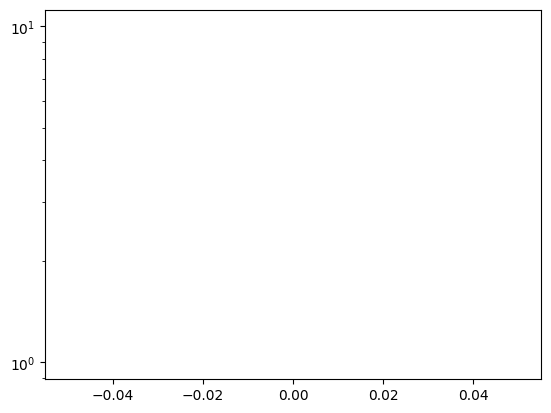

結果のノルム: nan
power=  0.0


C:\EMSolution\EMSolpy5\EMPY_Analysis\Test\..\include\MatrixSolver.py:196: RuntimeWarning: invalid value encountered in scalar divide
  norm = np.linalg.norm(result)/np.linalg.norm(fcut)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [3]:

fesPhi = H1(mesh,  order=feOrder, definedon="sig", dirichlet="in|out", complex=False)
phi, psi =fesPhi.TnT()
gfPhi = GridFunction(fesPhi)

a=BilinearForm(fesPhi)
a += sigma*grad(phi)*grad(psi)*dx
f=LinearForm(fesPhi)
with TaskManager():
    a.Assemble()
h=1
gfPhi.Set(h, definedon=mesh.Boundaries("in"))

f=LinearForm(fesPhi)
f.Assemble()
fr=f.vec-a.mat*gfPhi.vec

gfPhi=solver.iccg_solve(fesPhi, gfPhi, a, fr.Evaluate(), 
    tol=1.e-16, max_iter=200, accel_factor=0, complex=False, logplot=True) 
E=-grad(gfPhi)
J=sigma*E
Draw(gfPhi,mesh)
Draw(J,mesh)


In [4]:
    a = BilinearForm(fesA)
    a += 1/mu*curl(A)*curl(N)*dx
    f = LinearForm(fesA)
    f += N*(J) * dx
    with TaskManager():
        a.Assemble()
        f.Assemble()

    gfA = GridFunction(fesA)

    mat = sp.csr_matrix (a.mat.CSR())
    #print(A)
    Acut = mat[:,fesA.FreeDofs()][fesA.FreeDofs(),:]
    fcut = array(f.vec.FV())[fesA.FreeDofs()]
    ucut = array(f.vec.FV(), copy=True)[fesA.FreeDofs()]

    rows, cols = Acut.nonzero()
    vals = Acut[rows, cols]
    vals = ravel(vals)
    dim=fcut.size
    size= (len(rows)-dim)/2-dim
    print('Dof=',dim, '   matrix size=', size)
    
    mat = SparseSolvPy.SparseMat(len(rows), rows, cols, vals)

    solver = SparseSolvPy.MatSolvers()
    solver.setSaveBest(True)
    solver.setSaveLog(True)
    solver.setDiagScale(True)
    solver.setDirvegeType(1)
    solver.setBadDivCount(10)
    solver.setBadDivVal(10.0)
    tol=1.e-16
    max_iter=200
    solver.solveICCG_py(len(fcut), tol, max_iter, 1.1, mat, fcut, ucut, True)
    
    
    log1 = solver.getResidualLog_py()
    print(log1)

    plt.plot(range(len(log1)), log1)    
    plt.yscale('log')
    plt.show(block=False)  
    
    array(gfA.vec.FV(), copy=False)[fesA.FreeDofs()] = ucut
    print("min:", min(log1))
    #log1min.append(min(log1))

    result = Acut.dot(ucut) - fcut
    norm = linalg.norm(result)/linalg.norm(fcut)
    print("結果のノルム:", norm)
    
    B=curl(gfA)
    Draw(B,mesh)
    

NameError: name 'fesA' is not defined